In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import risktools as rt
from loader import _load_json
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
up = {"m*": {"user": "", "pass": ""}, "eia": "", "quandl": ""}

up["eia"] = os.getenv("EIA")
up["quandl"] = os.getenv("QUANDL")
up["m*"]["pass"] = os.getenv("MS_PASS")
up["m*"]["user"] = os.getenv("MS_USER")


In [25]:
rt.data.open_data("crudeassaysXOM")

/home/bcho/PROJECTS/risktools-dev/src/risktools/data/__init__.py:122: UserWarning: File actions for crudeassaysXOM not defined. Running default behavior.
  _warnings.warn(f"File actions for {nm} not defined. Running default behavior.")


,Terengganu,Sable-Island,Gippsland-Blend,Aasgard-Blend,Kutubu,Gudrun-Blend,Tapis,Jotun-Blend,Gullfaks-Blend,Statfjord-Blend,...,Kissanje-Blend,Girassol,Basrah-Light,Hungo-Blend,Grane,Balder-Blend,Pazflor,Basrah-Heavy,Hebron,Kearl
Terengganu,"[Cut volume, %, API Gravity,, Specific Gravity...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Whole.crude,"[100, 73.096978231478, 0.691603567281961, 84.7...","[100, 61.0997685830538, 0.734684164165969, 85....","[100, 55.4057052675305, 0.7570662425604491, 85...","[100, 52.474379441330171, 0.76912883429578116,...","[100, 51.4002034765444, 0.7736459408485371, 85...","[100, 49.5001391082794, 0.7817673549706541, 85...","[100, 42.699674831881, 0.8122862464385241, 85....","[100, 41.0790096871616, 0.8199143120388781, 85...","[100, 39.6000620183445, 0.827001453598708, 86....","[100, 39.3991288617133, 0.8279737933275121, 85...",...,"[100, 30.3010425716017, 0.874530829660026, 86....","[100, 30.20719853232049, 0.87503834884455267, ...","[100, 29.882526386345, 0.8767987660650031, 84....","[100, 29.402759234916, 0.87941313544171, 86.19...","[100, 28.412478508631807, 0.88485902613511214,...","[100, 26.4216541857613, 0.8960139173412871, 86...","[100, 24.6981750628915, 0.905900468702829, 86....","[100, 24.0321254839942, 0.9097798899080941, 84...","[100, 20.4009779336978, 0.9315279066982861, 86...","[100, 20.1591772117788, 0.933013106107041, 84...."
Butane.and.Lighter.IBP...60F,"[1.15752490495666, 115.459634524323, 0.5729681...","[1.9486667526084, 111.464324624541, 0.58239002...","[2.07902809212302, 117.502824518828, 0.5682666...","[4.81416023703796, 115.88170839304, 0.57199055...","[3.2576686815692, 116.358425733372, 0.57089041...","[3.27079997214518, 113.307395668004, 0.5780054...","[1.8414207735919899, 120.442860196281, 0.56163...","[3.38885204475063, 127.316724758371, 0.5467189...","[2.3202589303767898, 127.823241689152, 0.54565...","[3.03278932106488, 124.652561597485, 0.5524051...",...,"[1.44935464262527, 124.700338697685, 0.5523021...","[0.619007877399906, 120.099067584542, 0.562402...","[1.36361252214587, 119.204776605215, 0.5644088...","[2.41389107535706, 126.707988346795, 0.5480078...","[1.58731495639449, 124.67469547844, 0.55235744...","[0.9886254243665721, 126.683151637227, 0.54806...","[0.697971074988044, 125.087545681782, 0.551468...","[1.59719830152854, 125.590359333989, 0.5503901...","[0.075823146390414, 114.765707998457, 0.574582...","[0.7727193480334411, 119.794162352983, 0.56308..."
Lt..Naphtha.C5...165F,"[57.1544164301104, 86.5408400770614, 0.6489609...","[37.9118443694166, 82.9390061029649, 0.6598612...","[28.4260589733807, 88.0319486935577, 0.6445531...","[17.4504348969555, 84.8322533928548, 0.6540864...","[17.3099446031766, 82.4775005324734, 0.6612844...","[18.9685212060006, 83.5378262980031, 0.6580237...","[7.10709740395602, 82.543354414571, 0.66108102...","[8.55049842076471, 85.6100303394101, 0.6517432...","[8.31475023974282, 79.1810677283617, 0.6716313...","[8.18869899225564, 82.9293318080292, 0.6598910...",...,"[4.13419229070643, 80.5466189819644, 0.6673060...","[2.90565873701707, 83.9472999314632, 0.6567731...","[5.5393058972575, 86.9960207574703, 0.64760904...","[4.79249688762258, 83.39651569186, 0.658456464...","[3.75134319543829, 85.2526964606357, 0.6528177...","[2.8866470075048003, 80.3844765337572, 0.66781...","[1.85340648044557, 84.2862190904937, 0.6557415...","[4.64535473568261, 87.6815683258627, 0.6455834...","[0.346578001452229, 81.8174757111103, 0.663330...","[10.984743471403, 88.9778793281089, 0.64178774..."
Hvy.Naphtha.165...330F,"[33.010559440645, 57.2094701680496, 0.74982988...","[45.9113597725672, 51.7831209573447, 0.7720296...","[31.546845628907, 56.1044235951981, 0.75424660...","[35.9777534270044, 54.5304057164935, 0.7606283...","[38.5827614635404, 54.8975620664002, 0.7591301...","[32.7477950947727, 52.8574385307253, 0.7675307...","[19.0758584968552, 54.3540932045394, 0.7613499...","[20.5249214732641, 57.0695824018502, 0.75038

Half-life of theta in days =  34.93461790022124


<AxesSubplot:>

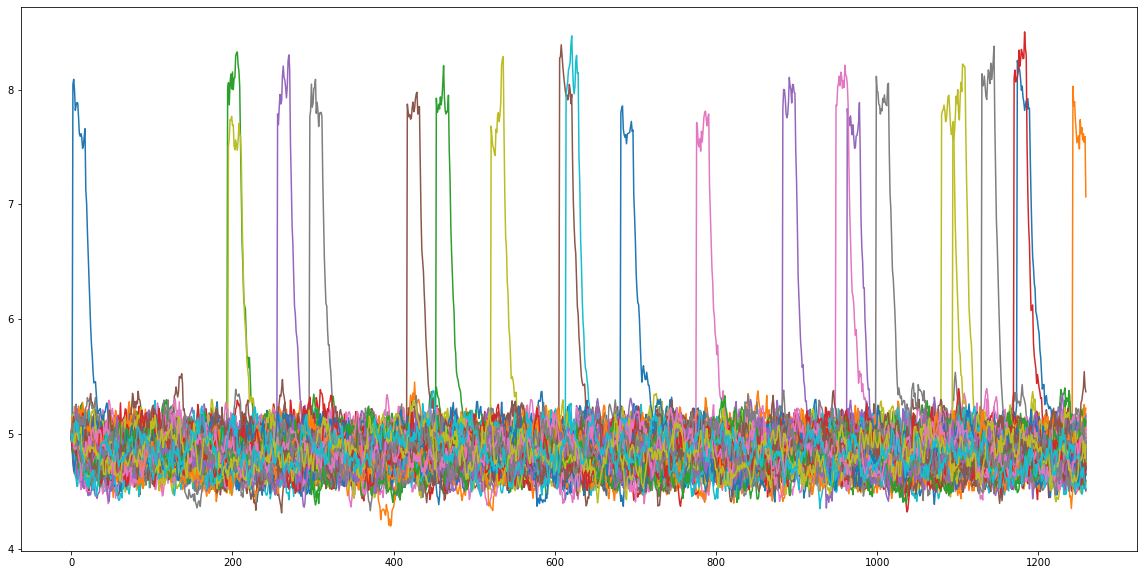

In [70]:
rt.simOUJ(theta=5,dt=1/252, mr_lag=15, T=5).iloc[:,:100].plot(legend=False, figsize=(20,10))

In [ ]:
mvgbm = rt.MVGBM(
    s0=[100,100,100], 
    r=0.0, 
    sigma=[.2,.2,.2], 
    T=0.25, 
    dt=1/252, 
    cor=[[1,0.5,0.5],[0.5,1,0.5],[0.5,0.5,1]],
    asset_names=['A','B','C']
    )
mvgbm.fit()
mvgbm.simulate()
mvgbm.plot_efficient_frontier(strike=100)

In [ ]:
i = np.random.randint(0,1000)
print(i)
prices = pd.DataFrame(mvgbm.sims[:,i,:])
prices

In [ ]:
returns = np.log(prices) - np.log(prices).shift(1)

In [ ]:
returns.dropna().std()*np.sqrt(252)

In [ ]:
mvgbm2 = rt.MVGBM(
    r=0.0, 
    T=0.25, 
    dt=1/252, 
    prices=prices
    )
mvgbm2.fit()
mvgbm2._s0=[100,100,100]
mvgbm2.simulate()
mvgbm2.plot_efficient_frontier(strike=100, portfolio_sims=10000)

In [ ]:
pd.DataFrame(mvgbm2.sims[:,:,0]).iloc[:,:100].plot(legend=False)

In [ ]:
mvgbm2._sigma

In [ ]:
mvgbm2._cor